导入包

In [68]:
import markov_clustering as mc
import networkx as nx
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import classification_report

导入数据集

In [85]:
iris = load_iris()
X = np.array(iris.data[:,2:4])
Y =  np.array(iris.target)

生成点的位置字典，其中键是结点id,值是包含2D坐标的元组

In [12]:
positions = {i:X[i] for i in range(150)}

In [155]:
x1 = X[:,0]
x2 = X[:,1]

A = np.array([])
a = 1/np.sqrt(2)

for i in np.arange(0,len(x1)):
    for j in np.arange(0,len(x1)):
        A = np.append(A,np.exp(-(pow(x1[i]-x1[j],2)+pow(x2[i]-x2[j],2))/(2*pow(a,2))))

A = A.reshape(len(x1),len(x1))

#阈值
c = 0.555

A[A<c] = 0

生成边集合

In [156]:
E= []
for i in np.arange(0,150):
    for j in np.arange(i,150):
        if A[i,j] != 0:
             E.append((i,j))       

使用network生成图形

In [157]:
G = nx.Graph()
G.add_nodes_from(positions)
G.add_edges_from(E)

使用默认参数(默认膨胀算子为2)进行聚类,得到趋于稳定的随机游走矩阵和簇

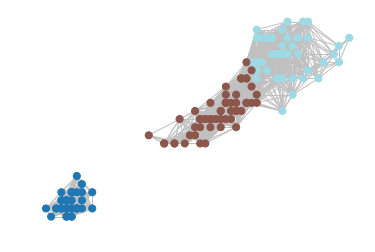

In [179]:
result = mc.run_mcl(A)           
clusters = mc.get_clusters(result)
mc.draw_graph(A, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

手动调整膨胀算子，得出膨胀算子在1.9~2之间聚类效果最好

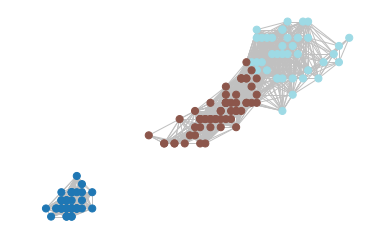

In [190]:
result = mc.run_mcl(A, inflation=1.9)
clusters = mc.get_clusters(result)
mc.draw_graph(A, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

赋予标签

In [180]:
predict = np.zeros((150,1),int) 
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        predict[clusters[i][j],0] = i

输出聚类的评价指标

In [181]:
print(classification_report(Y,predict,target_names = None))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      1.00      0.92        50
           2       1.00      0.82      0.90        50

   micro avg       0.94      0.94      0.94       150
   macro avg       0.95      0.94      0.94       150
weighted avg       0.95      0.94      0.94       150

